# How to do analysis on individual spectral lines

Many of the tools in SpecpolFlow can be applied to a single line in an observed spectrum.  In this example we analyze couple emission lines in the spectrum of a T Tauri star.

:::{Warning}
Still under construction
:::

First, import SpecpolFlow and any other packages.

In [1]:
import specpolFlow as pol

import pandas as pd
import matplotlib.pyplot as plt

## 1 . Create individual line file

In this tutorial, we use the UPENA normalized spectrum `IndividualLine_tutorialfiles/1423137pn.s` of the active cool star BP Tau.

We first load in the spectrum. 

In [2]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

To create the individual line file, we have to define the transition wavelength `lambda0` and the range with respect to the line center. In the example below, we select the HeI line at 667.815 nm in a 0.6 nm window.

In [3]:
# Create individual line profile 
lambda0 = 667.815;  geff = 1.0 # He i 667.815 nm
lwidth = 0.3 

prof = spec.individual_line(lambda0 =  lambda0, lwidth = lwidth)

The object `prof` inherits all the atributes from the LSD class. Therefore, you can use all the functionality discussed in the LSD Class Tutorial (i.e., one can normalize, slice, or shift the emission line profile).

Below, we visualize the individual line using the `plot` class function. 

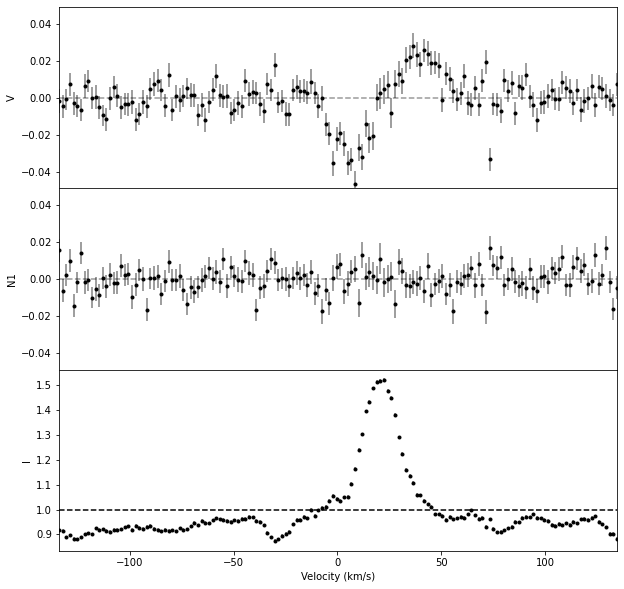

In [4]:
fig, axes = prof.plot()
axes[-1].axhline(1, color='k', ls = '--')

## 2. Calculate Bz

Below, we demonstrate how to compute the longitudinal field (Bz) of the individual line. 

using AUTO method for the normalization
  using the median of the continuum outside of the line


/tmp/ipykernel_1011414/4273064310.py:5: UserWarning: The velocity spacing is uneven: min spacing 1.7058786346829233km/s, max spacing 1.840553263700576km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',


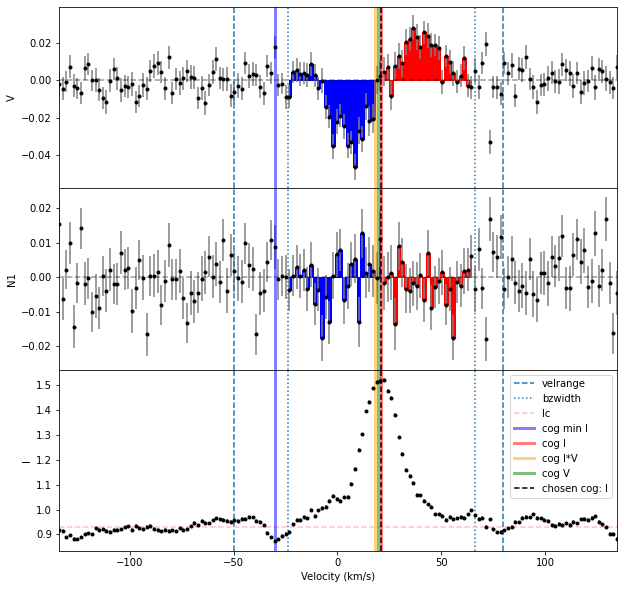

In [5]:
# Define the limits for the continuum normalization
cmin = -50.0; cmax = 80.0

# Compute Bz in a 45 km/s window
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                   velrange=[cmin, cmax], bzwidth=45.0, 
                   geff=geff, lambda0=lambda0,
                   plot=True)

We can then display the results using the pandas dataframa. For this particular line, we find Bz $= 1.2 \pm 0.1$kG.

In [6]:
Bz = pd.DataFrame(data=[Bz])

# Simple display of the pandas dataframe
Bz.style

,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,0.931285,21.173209,-23.826791,66.173209,1191.652271,130.184898,0.000000,-34.686996,130.041356,0.564259,0.000000,0.000000,0.000000


## 3. Normalize the individual line

In the figure above, we can promptly note that `calc_bz` improved the continuum normalization, taking the median of the continuum outside of the line. 
Therefore, we propagate this normalization in the `prof` object before saving the individual line profile into a file.

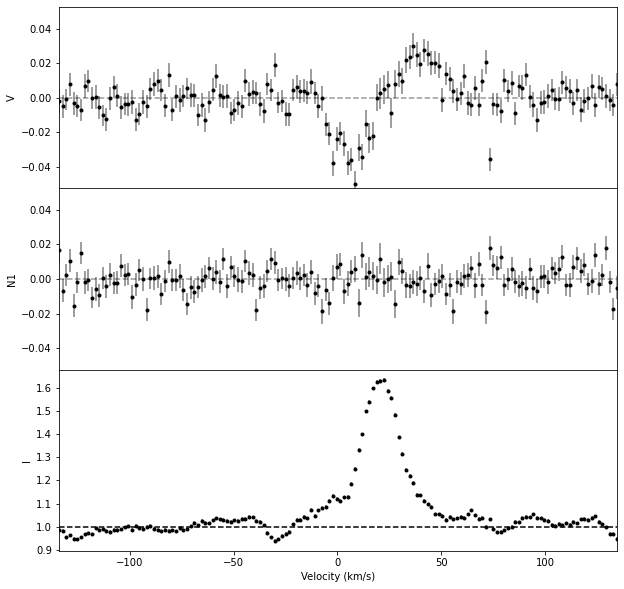

In [7]:
# Renormalize prof using the continuum value obtained by calc_bz
prof_norm = prof.norm(Bz['Ic'][0])

# Display the profile
fig, axes = prof_norm.plot()
axes[-1].axhline(1, color='k', ls = '--')

## 4. Saving individual lines

Finally, you can save the individual line into a file running the code below.

In [8]:
prof_norm.save("IndividualLine_tutorialfiles/1423137.Helium")

## 5. Dealing with order overlaps

Now, let's do the same for the Halpha line:

using AUTO method for the normalization
  using the median of the continuum outside of the line


/tmp/ipykernel_1011414/3543408693.py:13: UserWarning: 
 The velocity array is not monotonically increasing. 
 There might be an order overlap in the region of the observation used. 
 calc_bz will sort the LSD profile in velocity order. 
 Make sure this is what you want -- merge orders before running calc_bz()!
  Bz, fig = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/3543408693.py:13: UserWarning: The velocity spacing is uneven: min spacing 0.0km/s, max spacing 1.6444980866454273km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',


,Merge type,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,None,1.101100,9.725353,-190.274647,209.725353,72.964936,17.843167,0.000000,7.405907,17.843162,0.435065,0.000000,0.000000,0.000000


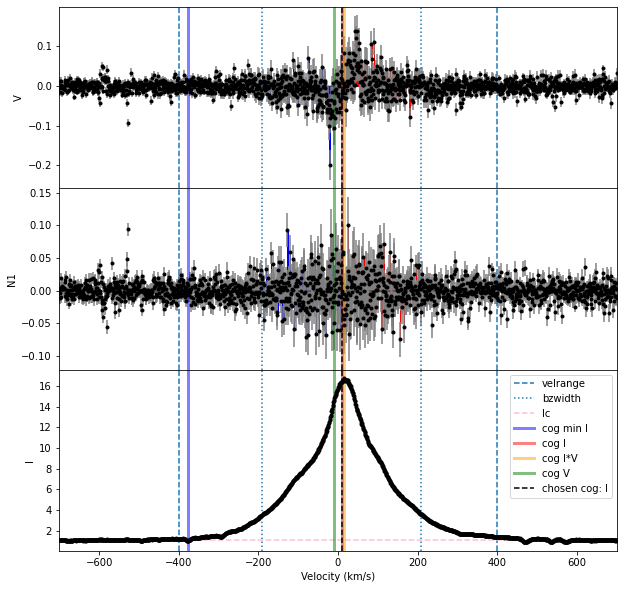

In [9]:
# reading the spectrum
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")
# defining the line parameters
lambda0 = 656.281 ;  geff = 1.0 # Halpha
lwidth = 700. * lambda0 / 2.99e5 #width in nm from width in km/s
# getting the profile for that line
prof = spec.individual_line(lambda0=lambda0, lwidth=lwidth)

# Define the limits for the continuum normalization
# Compute Bz in a 300 km/s window around the cog
cogRange = [-400., 400.]
intRange = 200.
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                       velrange=cogRange, bzwidth=intRange, 
                       geff=geff, lambda0=lambda0,
                       plot=True)   

# Creating a dataframe to record the result of the different methods in this section
d = {'Merge type':'None'}
d.update(Bz)
df_results = pd.DataFrame(data=[d])
df_results.style

### 5.1 Option 1: Selecting only one order

There are 2 orders with Halpha in them
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


/tmp/ipykernel_1011414/788376859.py:20: UserWarning: The velocity spacing is uneven: min spacing 1.4617760770123809km/s, max spacing 1.6444980866454273km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/788376859.py:20: UserWarning: The velocity spacing is uneven: min spacing 1.9642616034642941km/s, max spacing 2.101303110753989km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',


,Merge type,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,None,1.101100,9.725353,-190.274647,209.725353,72.964936,17.843167,0.000000,7.405907,17.843162,0.435065,0.000000,0.000000,0.000000
1,lower only,1.104800,14.197130,-185.802870,214.197130,94.012588,25.428151,0.000003,5.209152,25.428140,0.221315,0.000000,0.000000,0.000000
2,higher only,1.096300,13.943177,-186.056823,213.943177,54.213318,21.662775,0.000007,3.435552,21.662771,0.803308,0.000000,0.000000,0.000000


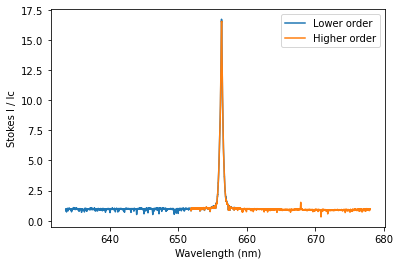

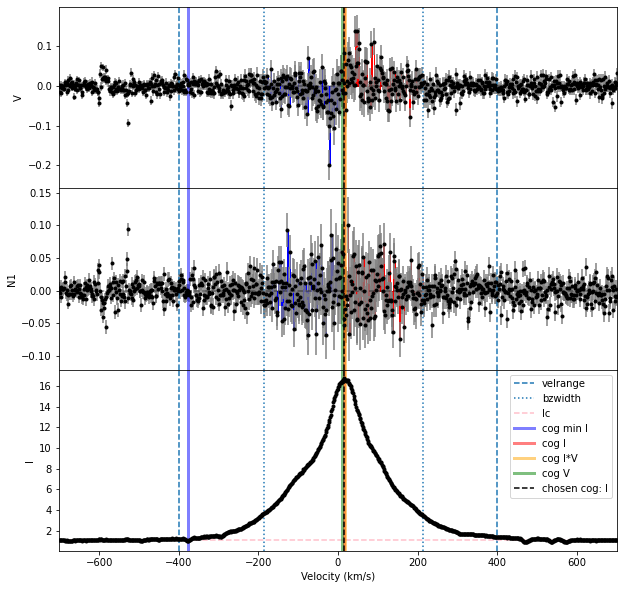

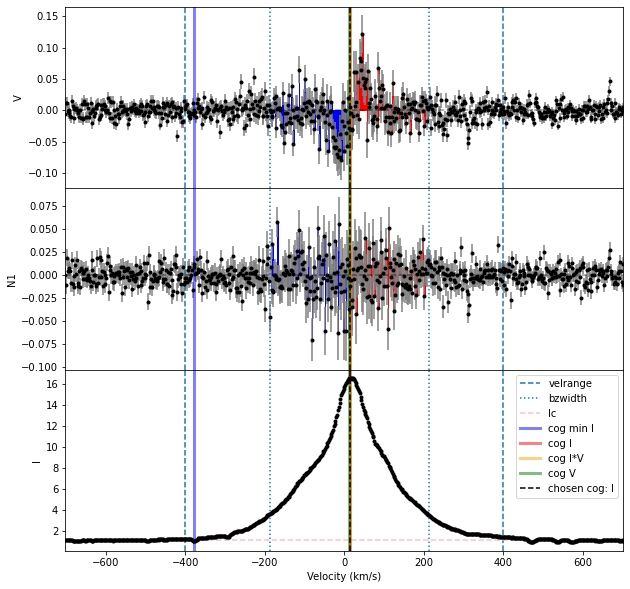

In [10]:
## Selecting only one order
orders = spec.get_orders_in_range(lambda0)
print('There are {} orders with Halpha in them'.format(len(orders)))

# Illustration of the order overlap
fig, ax = plt.subplots(1,1)
ax.plot(orders[0].wl, orders[0].specI, label='Lower order')
ax.plot(orders[1].wl, orders[1].specI, label='Higher order')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Stokes I / Ic')
ax.legend(loc=0)

# Making a loop over the 
for ord, type in zip(orders,['lower only', 'higher only']):

# getting the profile for that line
    prof = ord.individual_line(lambda0=lambda0, lwidth=lwidth)

    # Compute Bz, in the defined velocity window around the cog
    Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                           velrange=cogRange, bzwidth=intRange, 
                           geff=geff, lambda0=lambda0,
                           plot=True)
    d = {'Merge type':type}
    d.update(Bz)
    df = pd.DataFrame(data=[d])
    df_results = pd.concat([df_results,df], ignore_index=True)

# Display the Bz result as a dataframe
df_results.style

### 5.2 Option 2: merging the orders

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


/tmp/ipykernel_1011414/1180956204.py:5: UserWarning: The velocity spacing is uneven: min spacing 1.9642616034642941km/s, max spacing 2.101303110753989km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/1180956204.py:19: UserWarning: The velocity spacing is uneven: min spacing 1.4617760770123809km/s, max spacing 1.6444980866454273km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',


,Merge type,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,None,1.101100,9.725353,-190.274647,209.725353,72.964936,17.843167,0.000000,7.405907,17.843162,0.435065,0.000000,0.000000,0.000000
1,lower only,1.104800,14.197130,-185.802870,214.197130,94.012588,25.428151,0.000003,5.209152,25.428140,0.221315,0.000000,0.000000,0.000000
2,higher only,1.096300,13.943177,-186.056823,213.943177,54.213318,21.662775,0.000007,3.435552,21.662771,0.803308,0.000000,0.000000,0.000000
3,trim at mid-point,1.096300,13.943177,-186.056823,213.943177,54.213318,21.662775,0.000007,3.435552,21.662771,0.803308,0.000000,0.000000,0.000000
4,coadd,1.098296,14.040448,-185.959552,214.040448,69.328145,15.158243,0.000000,5.479275,15.158239,0.999346,0.000000,0.000000,0.000000


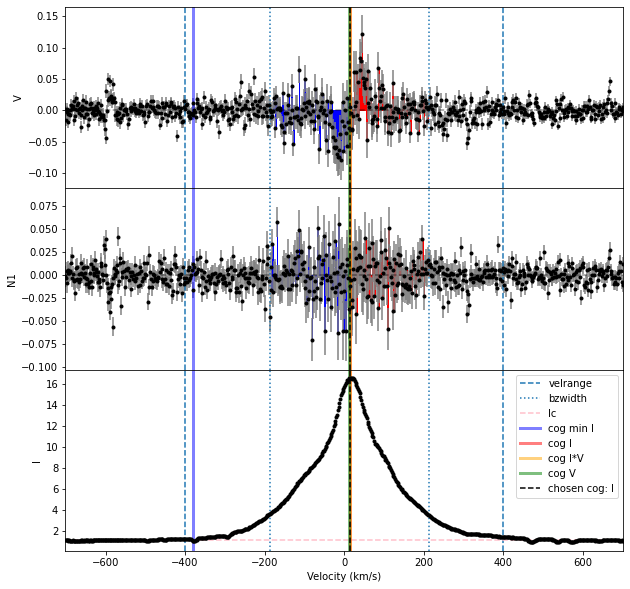

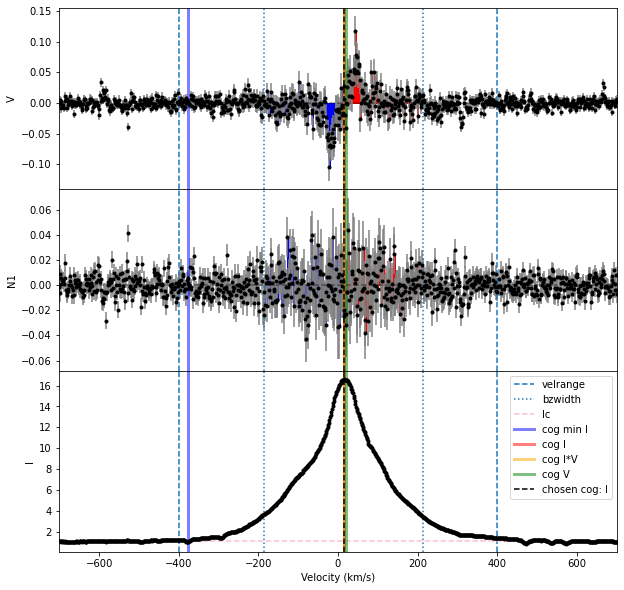

In [11]:
## Merging using the trim method
merge = spec.merge_orders(mode='trim', midpoint=0.5)

prof = merge.individual_line(lambda0 = lambda0, lwidth = lwidth)
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                       velrange=cogRange, bzwidth=intRange, 
                       geff=geff, lambda0=lambda0,
                       plot=True)
d = {'Merge type':'trim at mid-point'}
d.update(Bz)
df = pd.DataFrame(data=[d])
df_results = pd.concat([df_results,df], ignore_index=True)


## Merging using the coadd method
merge = spec.merge_orders(mode='coadd')

prof = merge.individual_line(lambda0 = lambda0, lwidth = lwidth)
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                       velrange=cogRange, bzwidth=intRange, 
                       geff=geff, lambda0=lambda0,
                       plot=True)
d = {'Merge type':'coadd'}
d.update(Bz)
df = pd.DataFrame(data=[d])
df_results = pd.concat([df_results,df], ignore_index=True)

# Display the Bz result as a dataframe
df_results.style

The Halpha line is somewhat complicated to analyze, in that it has a very broad emission component from regions not associated with the magnetic field.  This makes the correct velocity range to use for integration in the Bz calculation ambiguous.

For a somewhat cleaner example that is still in a region where two spectral orders overlap, we can look at the He I 587.56 nm line.

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


/tmp/ipykernel_1011414/864346748.py:13: UserWarning: 
 The velocity array is not monotonically increasing. 
 There might be an order overlap in the region of the observation used. 
 calc_bz will sort the LSD profile in velocity order. 
 Make sure this is what you want -- merge orders before running calc_bz()!
  Bz, fig = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/864346748.py:13: UserWarning: The velocity spacing is uneven: min spacing 0.0km/s, max spacing 1.68376865583825km/s
  Bz, fig = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/864346748.py:28: UserWarning: The velocity spacing is uneven: min spacing 1.530698777960943km/s, max spacing 1.68376865583825km/s
  Bz = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/864346748.py:28: UserWarning: The velocity spacing is uneven: min spacing 1.938885118773726km/s, max spacing 2.0919549966510402km/s
  Bz = prof.calc_bz(norm='auto', cog='I',
/tmp/ipykernel_1011414/864346748.py:40: UserWarning: The velocit

,Merge type,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,None,0.991090,18.941158,-31.058842,68.941158,699.503139,66.521645,0.000000,49.584163,66.504701,0.000385,0.000000,0.000000,0.000000
1,lower only,0.992395,25.706350,-24.293650,75.706350,822.700767,91.691815,0.000000,-17.652850,91.658895,0.031436,0.000000,0.000000,0.000000
2,higher only,0.990170,25.578820,-24.421180,75.578820,793.994679,90.964654,0.000000,220.357069,90.937349,0.002410,0.000000,0.000000,0.000000
3,trim at mid-point,0.993520,25.587490,-24.412510,75.587490,797.884180,91.419382,0.000000,221.513065,91.391673,0.002410,0.000000,0.000000,0.000000
4,coadd,0.990281,25.660364,-24.339636,75.660364,805.924582,60.001692,0.000000,116.774813,59.981432,0.097482,0.000000,0.000000,0.000000


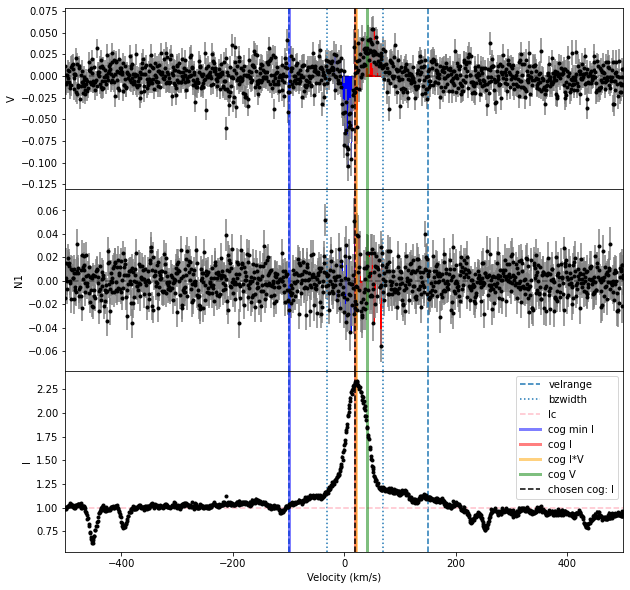

In [12]:
# reading the spectrum
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")
# defining the line parameters
lambda0 = 587.56 ;  geff = 1.0 # He I, really a multiplet (so geff is rather approximate)
lwidth = 500. * lambda0 / 2.99e5 #width in nm from width in km/s
# getting the profile for that line
prof = spec.individual_line(lambda0=lambda0, lwidth=lwidth)

# Define the limits for the continuum normalization
# Compute Bz in a 300 km/s window around the cog
cogRange = [-100., 150.]
intRange = 50.
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                       velrange=cogRange, bzwidth=intRange, 
                       geff=geff, lambda0=lambda0,
                       plot=True)   

# Creating a dataframe to record the result of the different methods in this section
d = {'Merge type':'None'}
d.update(Bz)
df_results = pd.DataFrame(data=[d])

orders = spec.get_orders_in_range(lambda0)
# Making a loop over the individual orders
for ord, type in zip(orders,['lower only', 'higher only']):
    # getting the profile for that line
    prof = ord.individual_line(lambda0=lambda0, lwidth=lwidth)
    Bz = prof.calc_bz(norm='auto', cog='I', 
                           velrange=cogRange, bzwidth=intRange, 
                           geff=geff, lambda0=lambda0,
                           plot=False)
    d = {'Merge type':type}
    d.update(Bz)
    df = pd.DataFrame(data=[d])
    df_results = pd.concat([df_results,df], ignore_index=True)

# Merging using the trim method
merge = spec.merge_orders(mode='trim', midpoint=0.5)
prof = merge.individual_line(lambda0 = lambda0, lwidth = lwidth)
Bz = prof.calc_bz(norm='auto', cog='I', 
                  velrange=cogRange, bzwidth=intRange, 
                  geff=geff, lambda0=lambda0,
                  plot=False)
d = {'Merge type':'trim at mid-point'}
d.update(Bz)
df = pd.DataFrame(data=[d])
df_results = pd.concat([df_results,df], ignore_index=True)

## Merging using the coadd method
merge = spec.merge_orders(mode='coadd')
prof = merge.individual_line(lambda0 = lambda0, lwidth = lwidth)
Bz = prof.calc_bz(norm='auto', cog='I', 
                  velrange=cogRange, bzwidth=intRange, 
                  geff=geff, lambda0=lambda0,
                  plot=False)
d = {'Merge type':'coadd'}
d.update(Bz)
df = pd.DataFrame(data=[d])
df_results = pd.concat([df_results,df], ignore_index=True)

# Display the Bz result as a dataframe
df_results.style